#### Steps Forehead:
1. First Solution
    * Use all Features as predictable values
    * without Standardization
    * train and test data with test size = 0.2
    

### Import Required Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.tree as tree
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score, r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline

### Import DataSet

In [3]:
#path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

# Import Data
df = pd.read_csv('Weather_Data.csv')
# check datatype and null values
df.info()
df.isnull().sum()
# There is no null value
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Pre-Processing
* USe One-Hot-Encoding For convert Categorical Variables to Numeric Variables
* One-Hot-Encoding Notes:
*   1. sparse_output=False :  is used to get a dense array, which we convert to a DataFrame for easy readability.
*   2. drop = None : This means no categories will be dropped during the encoding process

In [4]:
# Initialize One Hot Encoder
encoder = OneHotEncoder(sparse_output=False, drop = None)

# Fit and Transform the data
encoded_features = encoder.fit_transform(df[['RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']])

# Convert the data into DataFrame for better readability
encoded_features = pd.DataFrame(encoded_features, columns= encoder.get_feature_names_out(['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])) 

# check the encoded values
encoded_features.head()

# drop the Original Categorical Features
columns_to_drop = ['RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']
df = df.drop(columns = [col for col in columns_to_drop if col in df.columns],axis=1)
# Concatenate encoded data with Original Data
df_encoded = pd.concat([df, encoded_features], axis=1)
df_encoded.head()

# RainTomorrow is target Value and we need to convert it to numerical value
# if we Encoder it will generate 2 columns for RainTomorrow, and we dont want it, So use replace method to replace yes,no with 1,0
pd.set_option('future.no_silent_downcasting', True)
df_encoded['RainTomorrow'] = df_encoded['RainTomorrow'].replace(['No', 'Yes'], [0,1]).astype(int)


df_encoded.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Train Data and Test Data
* Set X for features and y for Target Value

In [5]:
y = df_encoded['RainTomorrow']
X = df_encoded.drop(['RainTomorrow', 'Date'], axis=1)
X.astype(float)
X.head()

# Split the Data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(y.value_counts())

RainTomorrow
0    2422
1     849
Name: count, dtype: int64


### Fit Linear Regression and Evaluate the performance of the Model
* MAE = average of the absolute differences between actual and predicted values
* MSE = average of the squared differences between actual and predicted values
    * MSE penalizing larger errors more heavily due to the squaring of the error terms.  


In [6]:
# Initialize The Model
LinearReg = LinearRegression()

# Fit the model
LinearReg.fit(x_train, y_train)

# Make a prediction
LinearReg_yhat = LinearReg.predict(x_test)

#Evaluation
#Calculate R2_Score
LinearReg_R2 = r2_score(y_test, LinearReg_yhat)
print(f'Linear Regression R2 Score : {LinearReg_R2}')

# Calculate MAE Score
LinearReg_MAE = mean_absolute_error(y_test, LinearReg_yhat)
print(f'Linear Regression MAE : {LinearReg_MAE}')

# Calculate MSE Score
LinearReg_MSE = mean_squared_error(y_test, LinearReg_yhat)
print(f'Linear Regression MSE : {LinearReg_MSE}')


Linear Regression R2 Score : 0.4271321073623009
Linear Regression MAE : 0.25631760994203784
Linear Regression MSE : 0.11572058282746588


## Visual Consideration

In [7]:
#sns.pairplot(df_encoded, hue = 'RainTomorrow', vars=['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am'])
#plt.show()

### KNN model
* fit the model with n_neighbors = 4
### Evaluation
* accuracy score : This function calculates the proportion of correctly predicted labels over the total number of predictions.
* F1_Score :  harmonic mean of precision and recall. It’s particularly useful for imbalanced datasets.
    1. precision : how many of the predicted positive instances are actually positive
    2. recall : how many of the actual positive instances are correctly predicted
* Jaccard Score: Only counts true positives relative to the combined set of predicted and actual positives.



In [8]:
# Initialize the Classifier
# Set weight = distance, because the dataset is imbalance and this setting has improved F1_Score
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

#Fit the Model On the Trainig data
knn.fit(x_train, y_train)

# Predict On test data
knn_yhat = knn.predict(x_test)

# Evaluation
# Calculate The accuracy score
knn_accuracy_score = accuracy_score(y_test,knn_yhat)
print(f'Knn_Accuracy_Score= {knn_accuracy_score}')

# Calculate F1-Score
knn_F1_score = f1_score(y_test,knn_yhat, average='binary')
print(f'knn_F1_score= {knn_F1_score}')

#Calculate Jaccard Score
knn_Jaccard_index = jaccard_score(y_test,knn_yhat)
print(f'Knn_Jaccard_Score= {knn_Jaccard_index}')

#Calculate precision and recall
knn_class_repo = classification_report(y_test,knn_yhat)
print(f'Knn_Class_Report= \n {knn_class_repo}')

# Calculate confusion matrix
knn_matrix = confusion_matrix(y_test,knn_yhat, labels=[1,0])
print(f'Knn_Confusion_Matrix= \n{knn_matrix}')

Knn_Accuracy_Score= 0.8091603053435115
knn_F1_score= 0.6312684365781711
Knn_Jaccard_Score= 0.46120689655172414
Knn_Class_Report= 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       471
           1       0.69      0.58      0.63       184

    accuracy                           0.81       655
   macro avg       0.77      0.74      0.75       655
weighted avg       0.80      0.81      0.80       655

Knn_Confusion_Matrix= 
[[107  77]
 [ 48 423]]


### Decision Tree
* DecisionTree Setting:
    1. class_weight = 'balanced' -->  Adjusts the weights of each class to account for the imbalance. --> set  to 'balanced', to ensure that the minority class is given more importance during training.
    2. max_depth = 5, 10 -->  Limiting depth can help prevent overfitting --> tune based on cross-validation performance.
    3. min_sample_split = 10 --> The minimum number of samples required to split an internal node. Setting this parameter higher can prevent the model from creating splits that are too specific to the majority class.
    4. min_samples_leaf =  This helps prevent the model from learning overly specific rules that only apply to the majority class.
    Set a higher value (e.g., min_samples_leaf=5) to ensure that leaves have enough samples to be reliable.
  5. max_features =  The number of features to consider when looking for the best split. Limiting the number of features can help reduce overfitting.
       {"sqrt", "log2"}
         
        Use the square root of the total number of features.
  
        Use the base-2 logarithm of the total number of features.
    6. splitter = The strategy used to choose the split at each node. {'best', 'random'}

#### Notes:
*  ** Tree.feature_importances_** : Indicates how important that feature was in making the decisions in the tree.



In [41]:
# Initialize the model
Tree = DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', splitter='best')

# Fit the model and make a prediction
Tree.fit(x_train, y_train)
Tree_yhat = Tree.predict(x_test)

# Show the depth of decision tree
Tree.get_depth()

# get the importance of each feature in DecisionTree
importance = Tree.feature_importances_


# Extract the name of the features
X_features_name = df_encoded.drop(columns=['RainTomorrow', 'Date']).columns.tolist()

# Pair feature names with their importance values
feature_importance = list(zip(X_features_name, importance))

# Sort the pair by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print features and their importance in making decision
for important, feature_name in feature_importance:
    print(important, feature_name)

    
# Evaluation
# Calculate the accuracy score
Tree_accuracy = accuracy_score(y_test,Tree_yhat)
print(f'Tree_Accuracy= {Tree_accuracy}')

# Calculate F1 Score 
Tree_F1_score = f1_score(y_test,Tree_yhat, average='binary')
print(f'Tree_F1_score= {Tree_F1_score}')

# Calculate Jaccard Score
Tree_Jaccard_index = jaccard_score(y_test,Tree_yhat)
print(f'Tree_Jaccard_Score= {Tree_Jaccard_index}')

# Calculate precision and recall
Tree_class_repo = classification_report(y_test,Tree_yhat)
print(f'Tree_Class_Report= \n {Tree_class_repo}')

# Calculate Confusion Matrix 
Tree_matrix = confusion_matrix(y_test,Tree_yhat, labels=[1,0])
print(f'Tree_Confusion_Matrix= \n{Tree_matrix}')

Sunshine 0.7318836697125739
Humidity3pm 0.06586693731162062
RainToday_Yes 0.04924659242407725
MinTemp 0.036090438936208113
WindGustSpeed 0.026006501066203058
Temp3pm 0.019879263357413277
WindSpeed3pm 0.016346338782340483
Humidity9am 0.01117045524735984
Temp9am 0.009860888171008565
WindDir3pm_S 0.008942986166432276
WindDir3pm_SE 0.008900835786461057
WindDir9am_S 0.006536219620239691
WindSpeed9am 0.006504825791100359
WindGustDir_W 0.002452385766595694
Cloud3pm 0.0003044153270727179
WindGustDir_SSW 7.246533293027844e-06
MaxTemp 0.0
Rainfall 0.0
Evaporation 0.0
Pressure9am 0.0
Pressure3pm 0.0
Cloud9am 0.0
RainToday_No 0.0
WindGustDir_E 0.0
WindGustDir_ENE 0.0
WindGustDir_ESE 0.0
WindGustDir_N 0.0
WindGustDir_NE 0.0
WindGustDir_NNE 0.0
WindGustDir_NNW 0.0
WindGustDir_NW 0.0
WindGustDir_S 0.0
WindGustDir_SE 0.0
WindGustDir_SSE 0.0
WindGustDir_SW 0.0
WindGustDir_WNW 0.0
WindGustDir_WSW 0.0
WindDir9am_E 0.0
WindDir9am_ENE 0.0
WindDir9am_ESE 0.0
WindDir9am_N 0.0
WindDir9am_NE 0.0
WindDir9am_NNE

### Visual Consideration


[Text(0.5024038461538461, 0.9166666666666666, 'x[5] <= 49.0\ngini = 0.5\nsamples = 2616\nvalue = [1308.0, 1308.0]'),
 Text(0.2692307692307692, 0.75, 'x[43] <= 0.5\ngini = 0.498\nsamples = 2156\nvalue = [1114.917, 969.69]'),
 Text(0.3858173076923077, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[8] <= 80.5\ngini = 0.496\nsamples = 2092\nvalue = [1090.112, 916.583]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[12] <= 4.5\ngini = 0.448\nsamples = 1597\nvalue = [911.108, 468.126]'),
 Text(0.038461538461538464, 0.25, 'x[9] <= 58.5\ngini = 0.337\nsamples = 823\nvalue = [504.83, 137.684]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.273\nsamples = 657\nvalue = [412.982, 80.644]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.473\nsamples = 166\nvalue = [91.848, 57.041]'),
 Text(0.11538461538461539, 0.25, 'x[4] <= 4.55\ngini = 0.495\nsamples = 774\nvalue = [406.278, 330.442]'),
 Text(0.09615384615384616, 0.0833333333333333

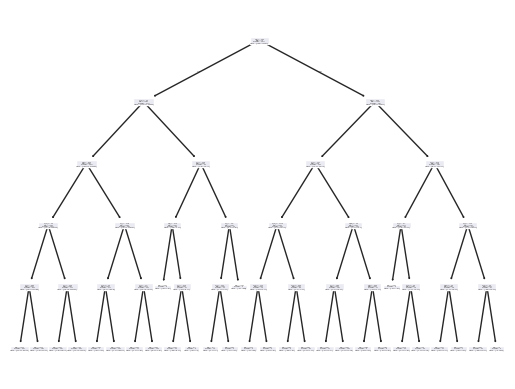

In [39]:
tree.plot_tree(Tree)

### Logistic Regression
* Logistic Regression setting:
    1. penalty = L2(ridge regulization --> prevent overfitting) --> recommended for imbalanced dataset
    2. class weight = balanced  --> This automatically adjusts the weights of the classes to account for the imbalance, which can improve the model’s ability to predict the minority class.
    3. solver = saga --> better choice is 'lbfg' but because convergence warning --> switched to --> saga
    4. max_iter = 200 --> I've got a warning error to increase max_iter from default 100 value to more value

In [19]:
# Initialize the model
LogReg = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear', max_iter=500)

# Fit the model
LogReg.fit(x_train, y_train)

# make a prediction on test data
LogReg_yhat = LogReg.predict(x_test)

# Evaluation
# Calculate accuracy
LogReg_Accuracy = accuracy_score(y_test,LogReg_yhat)
print(f'Logistic Regression Accuracy_Score= {LogReg_Accuracy}')

# Calculate F1 Score
LogReg_F1_score = f1_score(y_test,LogReg_yhat, average='binary')
print(f'LogReg F1_Score= {LogReg_F1_score}')

# Calculate Jaccard Index
LogReg_jaccard = jaccard_score(y_test,LogReg_yhat)
print(f'Logistic Regression Jaccard_Score= {LogReg_jaccard}')

LogReg_class_repo  = classification_report(y_test,LogReg_yhat)
print(f'LogReg_class_repo= \n{LogReg_class_repo}')

LogReg_conf_matrix = confusion_matrix(y_test,LogReg_yhat, labels=[1,0])
print(f'LogReg Confusion matrix= \n{LogReg_conf_matrix}')



Logistic Regression Accuracy_Score= 0.8137404580152672
LogReg F1_Score= 0.7136150234741784
Logistic Regression Jaccard_Score= 0.5547445255474452
LogReg_class_repo= 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       471
           1       0.63      0.83      0.71       184

    accuracy                           0.81       655
   macro avg       0.78      0.82      0.79       655
weighted avg       0.84      0.81      0.82       655

LogReg Confusion matrix= 
[[152  32]
 [ 90 381]]
